
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This dataset collects information from 100K medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of charachteristics about the patient are included in each row:
* 'ScheduleDay' tells us on what day the patient set up their appointment.
* 'Neighborhood' indicates the location of the hospital.
* 'Scholarship' indicates whether or not the patient is enrolled in Scholarship.

**N.B: The last column says 'No' if the patient showed up to their appointment, and 'Yes' if they didn't show up.**

We will try to understand what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [27]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
# Find the number of patients (rows) and their characteristics (columns)
df.shape

(110527, 14)

In [29]:
# Inspect data types and look for samples missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data

In [30]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The mean of ages is 37 years.
* Maximum age is 115 years.
* There is probably a mistake with one of the patients' age. it shows -1 year. which does not make sense. 

### Data Cleaning 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



In [36]:
# We create a copy dataframe from the original dataframe to make our amendments freely.
new_df = df.copy()

In [37]:
# We may not need the patient ID, Appointment ID, in our analysis, so we can drop them 
new_df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace=True)
new_df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [40]:
# We need to rename the "No_show" column to avoid confusion
new_df.rename(columns = {'No-show':'Absence'}, inplace = True)
new_df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Absence
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [39]:
# We need to correct "Hipertension" spelling
new_df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)
new_df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Absence
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Exploratory Data Analysis


**An overall look on the data** 

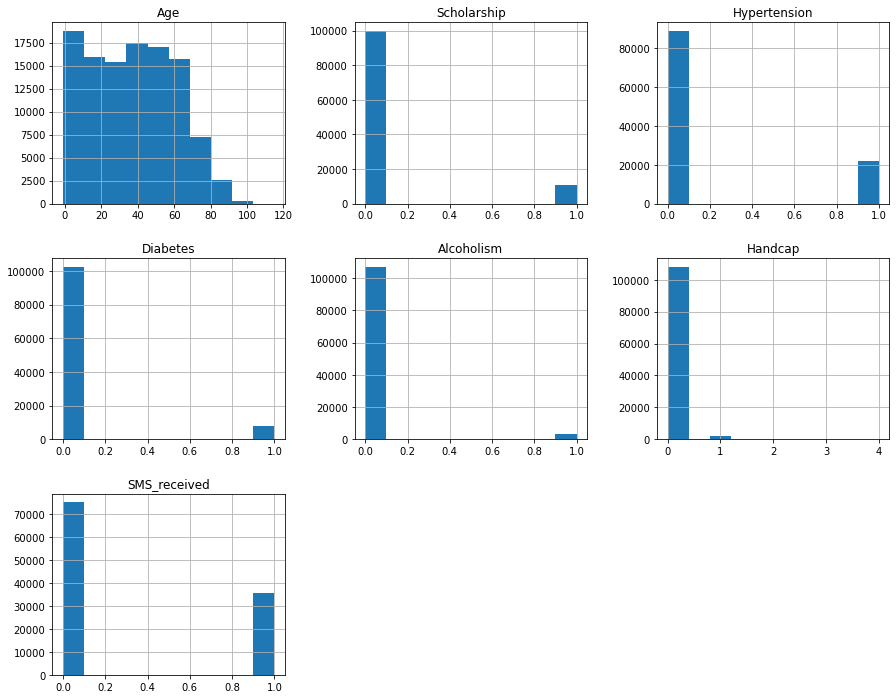

In [16]:
# Histogram of important dataset 
new_df.hist(figsize= (15,12));

* Most patients didn't suffer from chronic diseases nor are handicapped
    * About 18% (20000 out of 110000) suffered from hypertension
    * About 5% (almost 6000 out of 110000) suffered from diabetes
* Number of patients who received an SMS is half the number of those who didn't.
* About 9% (10000 out of 110000) are enrolled in the brasilian welfare program.

In [17]:
# Assigning names to show and no show to facilitate comparison
show = new_df.Absence == 'No'
noshow = new_df.Absence == 'Yes'

In [18]:
new_df[show].count()

Gender            88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hypertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
Absence           88208
dtype: int64

In [40]:
new_df[noshow].count()

Gender               22319
AppointmentDay       22319
Age                  22319
Neighbourhood        22319
Scholarship          22319
Hypertension         22319
Diabetes             22319
Alcoholism           22319
Handcap              22319
SMS_received         22319
Absence              22319
Appointment_month    22319
Appointment_day      22319
dtype: int64

The number of those who showed at the clinic was about 4 times those who did not show.

In [19]:
new_df['Gender'].value_counts(dropna=False)

F    71840
M    38687
Name: Gender, dtype: int64

Almost 35% of the scheduled requests are from males and the remaining are from females (around 65%), reflecting the females behaviour, interest, and caring of their health status and frequent checkup. 

### Analysing other charecteristics

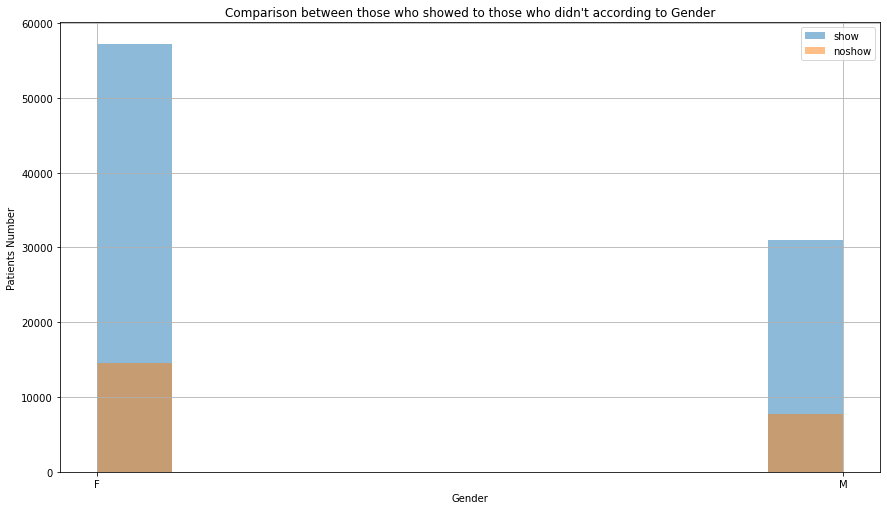

In [20]:
# Compare those who showed to those who didn't according to Gender

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.Gender[show].hist(alpha = 0.5, label = 'show')
new_df.Gender[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to Gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number');

In [21]:
# Compare those who showed to those who didn't according to Gender
print(new_df.Gender[show].value_counts())
print(new_df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


In [22]:
# Compare those who showed to those who didn't according to Gender
new_df.groupby('Gender').Absence.value_counts()

Gender  Absence
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: Absence, dtype: int64

* To what extent the gender affects showing up for appointment. It seems that Gender is insignificant. Females who showed were more than males who did, and females who didn't show were also more than males who didn't. (Cause 65% of people who scheduled for appointment are females, while 35% are males)
* Almost 20%  of males or females didn't show up for appointment.

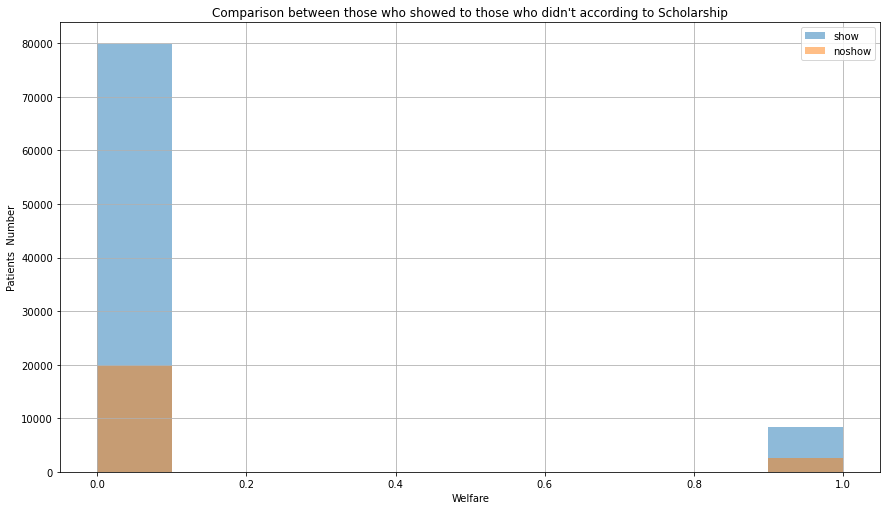

In [52]:
# Compare those who showed to those who didn't according to scholarship

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.Scholarship[show].hist(alpha = 0.5, label = 'show')
new_df.Scholarship[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to Scholarship')
plt.xlabel('Welfare')
plt.ylabel('Patients  Number');

In [23]:
# Compare those who showed to those who didn't according to Scholarship
new_df.groupby('Scholarship').Absence.value_counts()

Scholarship  Absence
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: Absence, dtype: int64

To what extent the enrollment in program affects showing up for appointment. Yet our data results showed that 23% from those who are enrolled in program didn't show up, versus 20% from those who don't enjoy the same program.

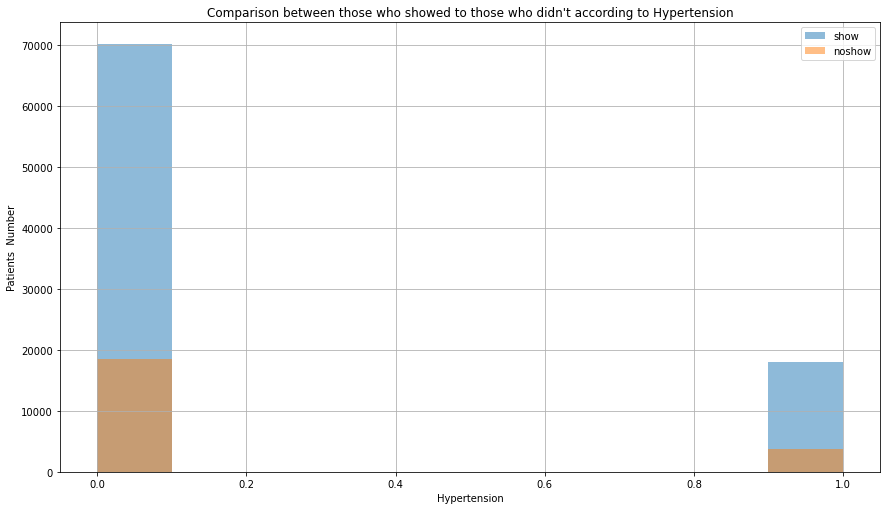

In [24]:
# Compare those who showed to those who didn't according to Hypertension

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.Hypertension[show].hist(alpha = 0.5, label = 'show')
new_df.Hypertension[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Patients  Number');

In [41]:
# Compare those who showed to those who didn't according to Hypertension
new_df.groupby('Hypertension').Absence.value_counts()

Hypertension  Absence
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: Absence, dtype: int64

To what extent suffering from Hypertension affects showing up for appointment. Yet our data results showed that 17% from those who have Hypertension didn't show up, versus 20% from those who don't suffer from Hypertension.

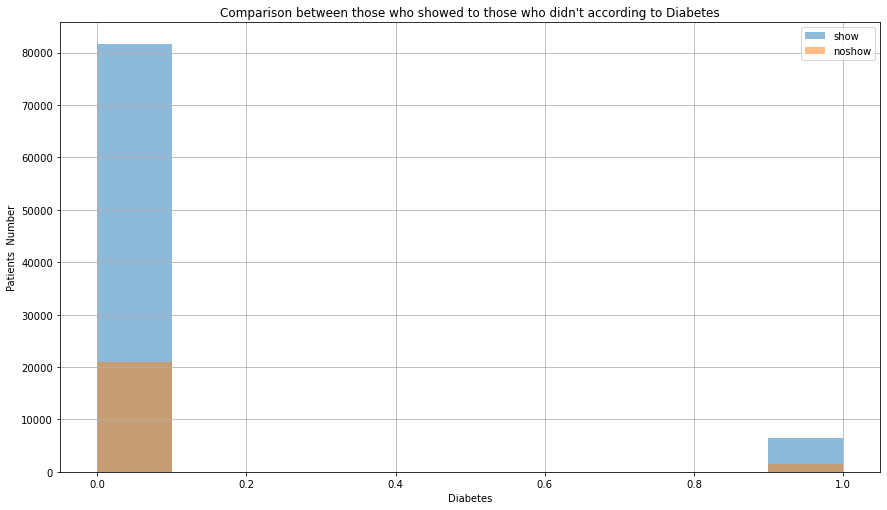

In [42]:
# Compare those who showed to those who didn't according to Diabetes

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.Diabetes[show].hist(alpha = 0.5, label = 'show')
new_df.Diabetes[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patients  Number');

In [43]:
# Compare those who showed to those who didn't according to Diabetes
new_df.groupby('Diabetes').Absence.value_counts()

Diabetes  Absence
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: Absence, dtype: int64

To what extent suffering from Diabetes affects showing up for appointment. Yet our data results showed that 18% from those who have Diabetes didn't show up, versus 20% from those who don't suffer from diabetes.

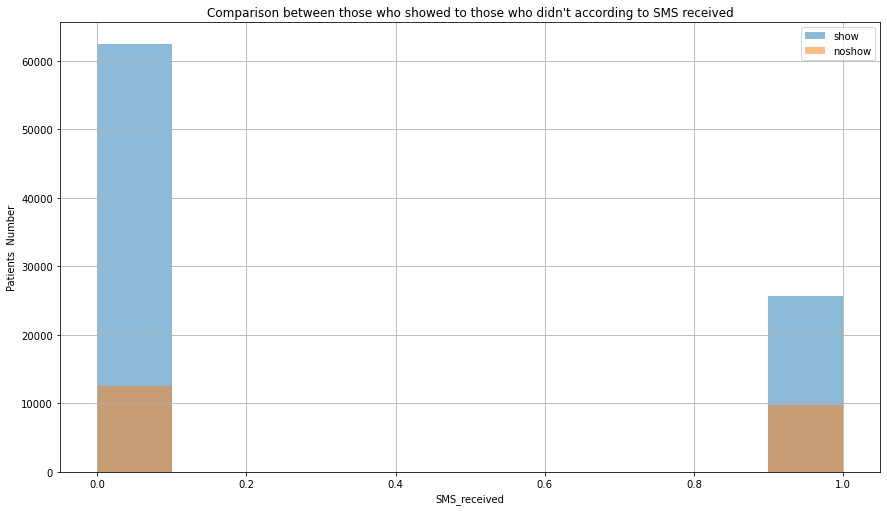

In [61]:
# Compare those who showed to those who didn't according to SMS received

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.SMS_received[show].hist(alpha = 0.5, label = 'show')
new_df.SMS_received[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to SMS received')
plt.xlabel('SMS_received')
plt.ylabel('Patients  Number');

It's quite weird to see that more people showed without receiving an SMS!

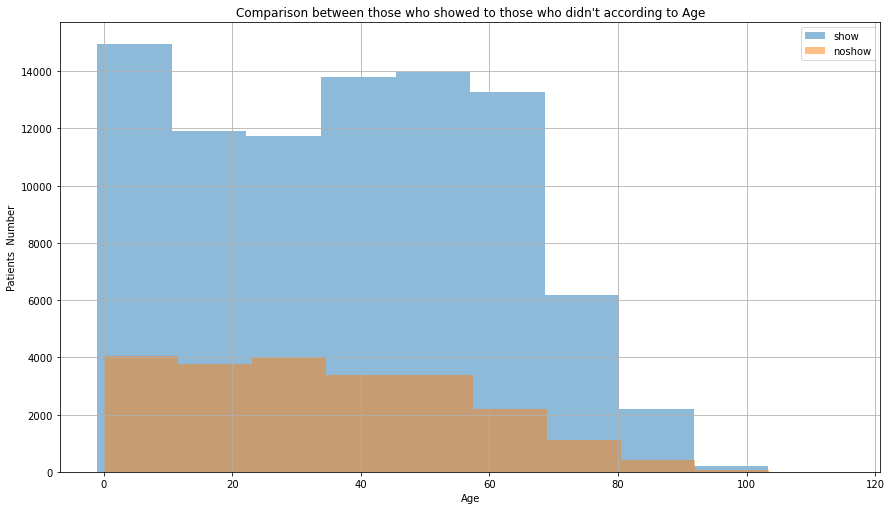

In [62]:
# Compare those who showed to those who didn't according to their age

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.Age[show].hist(alpha = 0.5, label = 'show')
new_df.Age[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to Age')
plt.xlabel('Age')
plt.ylabel('Patients  Number');

* Patients in the age group 0-10 showed more than all other age groups, followed by the age group 35-70
* Then the older people with age > 75 are less interest to get an appointment. 

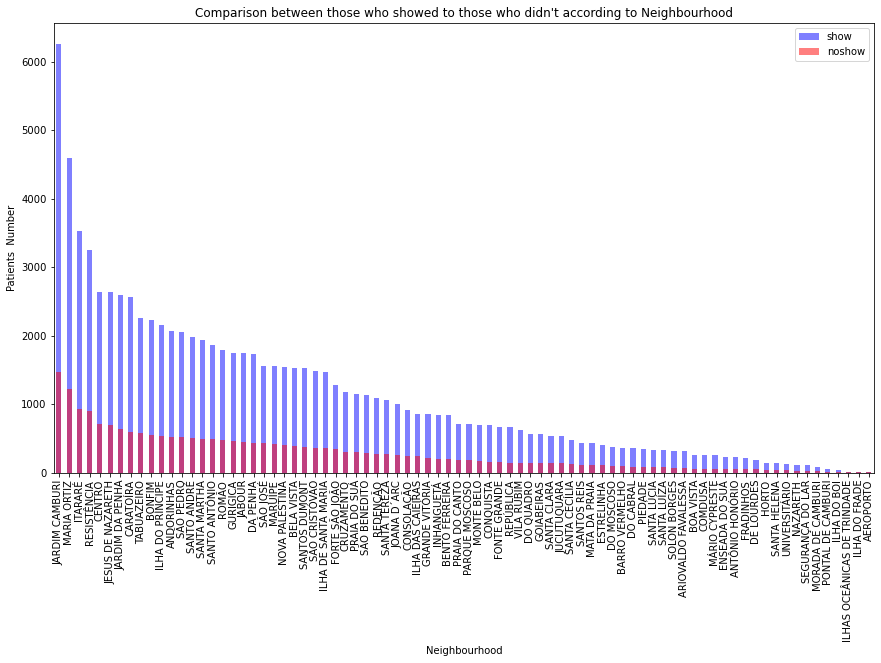

In [65]:
# Compare those who showed to those who didn't according to their Neighbourhood

plt.figure(figsize=[14.70,8.27]) #Set the size of the figure before plotting the variables.
new_df.Neighbourhood[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='show')
new_df.Neighbourhood[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='noshow')
plt.legend()
plt.title('Comparison between those who showed to those who didn\'t according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients  Number');

It seems that Neighbourhood is significant and is strongly affecting the showing of patients at the clinic.

## **Conclusions**

* Although it sounds weird, more people showed without receiving an SMS.
* Age has it's role at those in the 0-10 age group were the most to show up, followed by the age group 35-70.
* Almost 35% of the scheduled requests are from males and 65% from females, reflecting the females behaviour, interest, and caring of their health status and frequent checkup.
* Our dataset (110 K rows) results showed no direct correlation between patients showing/not-showing and others independent factors like gender and chronic diseases, yet we noticed the following:
    * Almost 20% of those who **enjoy** welfare program, who **suffer** from Diabetes, or Hypertension didn't show up for appointment.
    * Almost 20% of those who **don't enjoy** the welfare program, or who **don't suffer** from Diabetes or Hypertension also didn't show up for appointment.
    * Almost 80% of males & females showed up for appointment.
    * Almost 80% of the dataset (110 K) showed up for appointment.
    * Accordingly, we **conclude** that **majority of the dataset (80%) understudy showed-up for appointment**, despite of gender, Welfare program, or suffering from chronic diseases.
* Ultimately, we can say that the Neighbourhood has significance on the showing up at the clinic.

    ### **Limitations:**
* There is probably a mistake with one of the patients' age. it shows -1 year. which does not make sense.
* This dataset showed that most of the patients didn't suffer from chronic diseases nor are handicapped, we couldn't decide if these results are a good indicator (representative sample) of population (may we need to increase the sample).
* We noticed that 65% of the dataset scheduled for appointment are females, we couldn't determine if the females are greater than the males in Brasil (or from the population where the data is drawn from).
